# Homework #1
OZAN YEŞİL 090190325

# Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import gzip

from urllib.request import urlopen
from xmltodict import parse
from zipfile import ZipFile
from io import BytesIO
from io import StringIO
from collections import Counter
import xmltodict
import warnings
warnings.filterwarnings("ignore")

## Question 1

Use [World Bank's Data Service](https://data.worldbank.org/) to retrieve

* Literacy rates of women (percentage of females ages 15 and above)
* Child mortality rate, under 5 year old. (per 1,000 live births)
* Gini index (Economic Inequality)

**1. Plot each dataset for Turkey from earliest date available until this year.**  
**2. Plot the same data for Greece, Bulgaria, Romania, Poland, Syria and Iran for the same periods.**   
**3. Do a scatter plot of female literacy rate against child mortality rate for Turkey. Do you see a relation? Which direction do you think the relation works?**  
4. Do a scatter plot of female literacy rate against gini index for Turkey. Do you see a relation? Which direction do you think the relation works?  
5. Do a scatter plot of child mortality rate against the gini index for Turkey. Do you see a relation? Which direction do you think the relation works?

# Importing datasets with a function

In [3]:
def worldbank_import_csv(url, filename):
    with urlopen(url) as link:
        zfile = ZipFile(BytesIO(link.read()))
    print(zfile.filelist)
    raw = zfile.open(filename).read()[104:]
    raw_str = str(raw, 'utf-8')
    raw2 = StringIO(raw_str)
    raw3 = pd.read_csv(raw2)
    return raw3

In [4]:
literacy = worldbank_import_csv('https://api.worldbank.org/v2/en/indicator/SE.ADT.LITR.FE.ZS?downloadformat=csv', 'API_SE.ADT.LITR.FE.ZS_DS2_en_csv_v2_4639398.csv')

[<ZipInfo filename='Metadata_Indicator_API_SE.ADT.LITR.FE.ZS_DS2_en_csv_v2_4639398.csv' compress_type=deflate file_size=409 compress_size=287>, <ZipInfo filename='API_SE.ADT.LITR.FE.ZS_DS2_en_csv_v2_4639398.csv' compress_type=deflate file_size=119241 compress_size=27598>, <ZipInfo filename='Metadata_Country_API_SE.ADT.LITR.FE.ZS_DS2_en_csv_v2_4639398.csv' compress_type=deflate file_size=58978 compress_size=8010>]


In [5]:
mortality = worldbank_import_csv('https://api.worldbank.org/v2/en/indicator/SH.DYN.MORT?downloadformat=csv','API_SH.DYN.MORT_DS2_en_csv_v2_4651581.csv')

[<ZipInfo filename='Metadata_Indicator_API_SH.DYN.MORT_DS2_en_csv_v2_4651581.csv' compress_type=deflate file_size=483 compress_size=321>, <ZipInfo filename='API_SH.DYN.MORT_DS2_en_csv_v2_4651581.csv' compress_type=deflate file_size=134816 compress_size=39458>, <ZipInfo filename='Metadata_Country_API_SH.DYN.MORT_DS2_en_csv_v2_4651581.csv' compress_type=deflate file_size=58978 compress_size=8010>]


In [6]:
gini_index = worldbank_import_csv('https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=csv','API_SI.POV.GINI_DS2_en_csv_v2_4651513.csv' )

[<ZipInfo filename='Metadata_Indicator_API_SI.POV.GINI_DS2_en_csv_v2_4651513.csv' compress_type=deflate file_size=1088 compress_size=597>, <ZipInfo filename='API_SI.POV.GINI_DS2_en_csv_v2_4651513.csv' compress_type=deflate file_size=70438 compress_size=8746>, <ZipInfo filename='Metadata_Country_API_SI.POV.GINI_DS2_en_csv_v2_4651513.csv' compress_type=deflate file_size=58978 compress_size=8010>]


# Plotting Turkey

## Literacy rate, Mortality, Gini Index in order.

In [7]:
def country_plotting(table, country):
    cnt = table[table.index == str(country)].dropna(axis = 1)
    cnt = cnt.transpose()
    cnt = cnt.drop(['Country Code', 'Indicator Name','Indicator Code' ])
    return plt.plot(cnt.index, cnt[str(country)])

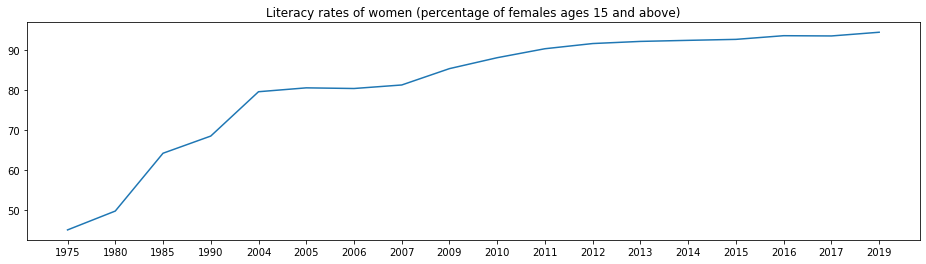

In [8]:
plt.figure(figsize=(16,4))
plt.title('Literacy rates of women (percentage of females ages 15 and above)')
country_plotting(literacy, 'Turkiye')

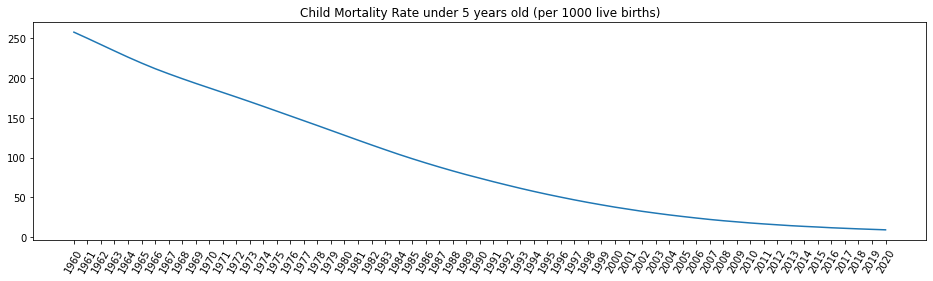

In [11]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=60)
plt.title('Child Mortality Rate under 5 years old (per 1000 live births)')
country_plotting(mortality, 'Turkiye')

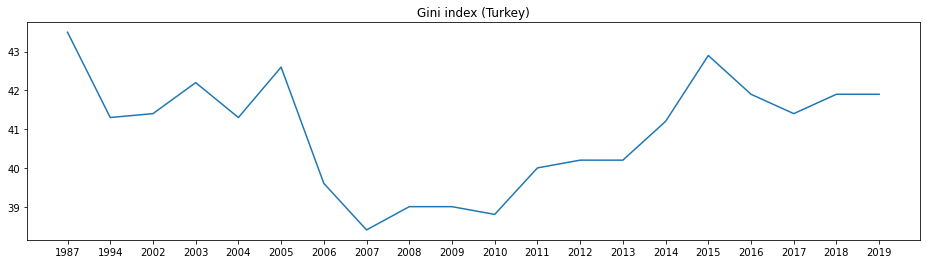

In [12]:
plt.figure(figsize=(16,4))
plt.title('Gini index (Turkey)')
country_plotting(gini_index, 'Turkiye')

**2. Plot the same data for Greece, Bulgaria, Romania, Poland, Syria and Iran for the same periods.**

I wrote a function `plot_world`. It plots the data for the given country as a subplot. I plotted given countries.

In [13]:
def plot_world(country):
    plt.figure(figsize=(16,4))
    plt.subplot(1,1,1)
    plt.show(country_plotting(literacy, str(country)))

    plt.figure(figsize=(24,6))
    plt.subplot(2,1,1)
    plt.xticks(rotation=45)
    plt.show(country_plotting(mortality, str(country)))

    plt.figure(figsize=(16,4))
    plt.subplot(3,1,1)
    plt.xticks(rotation=45)
    plt.show(country_plotting(gini_index, str(country)))
    

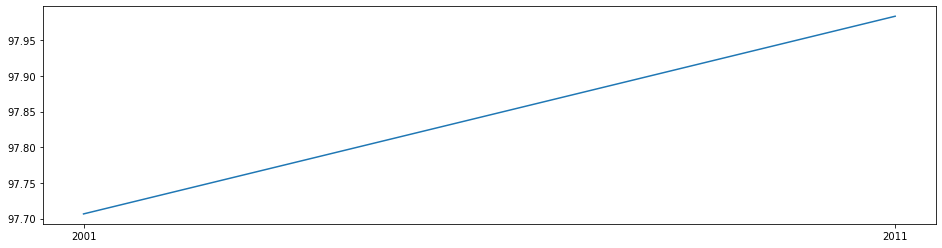

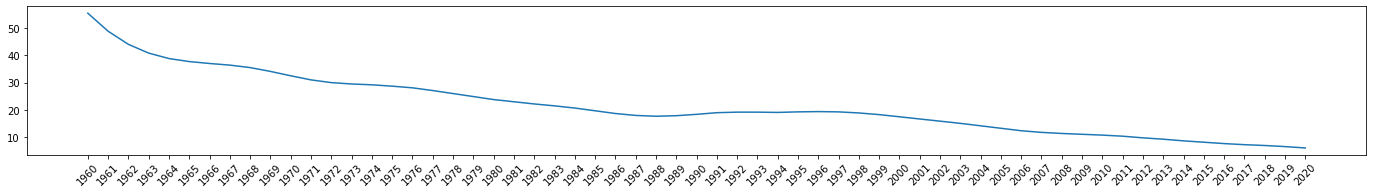

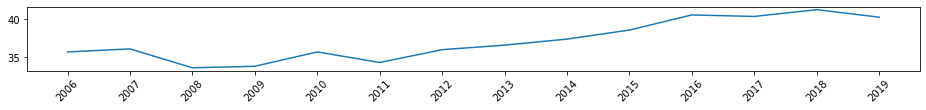

In [14]:
plot_world('Bulgaria')

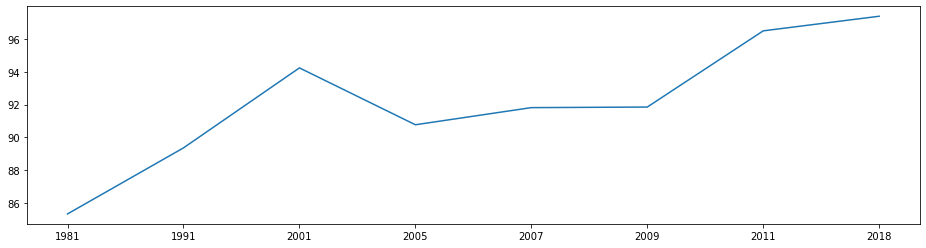

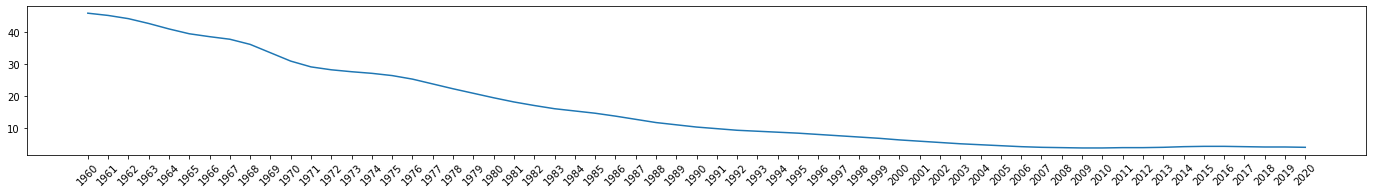

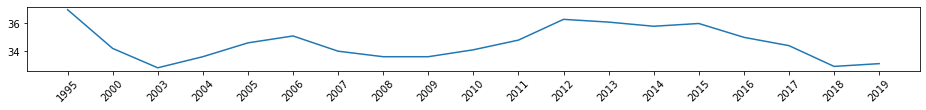

In [15]:
plot_world('Greece')

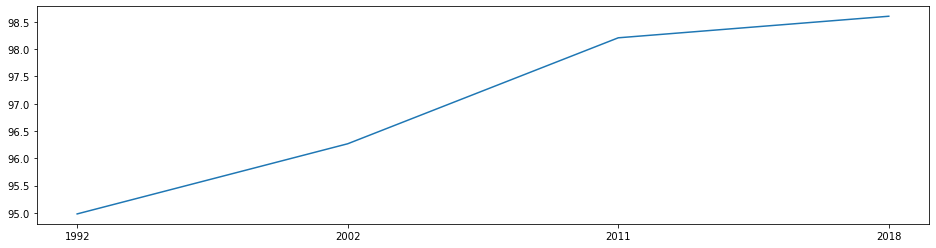

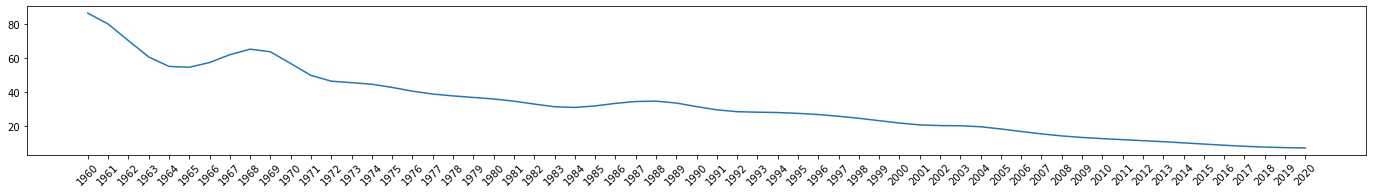

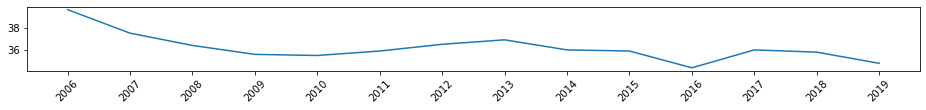

In [16]:
plot_world('Romania')

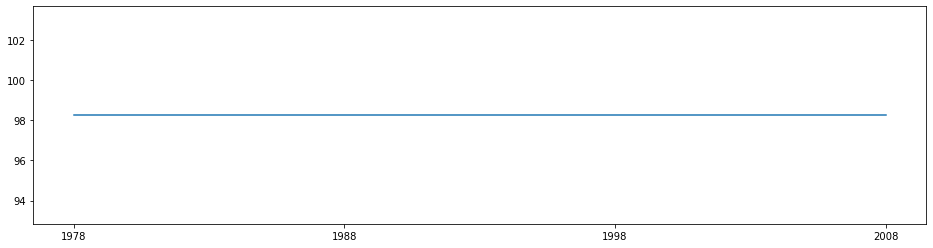

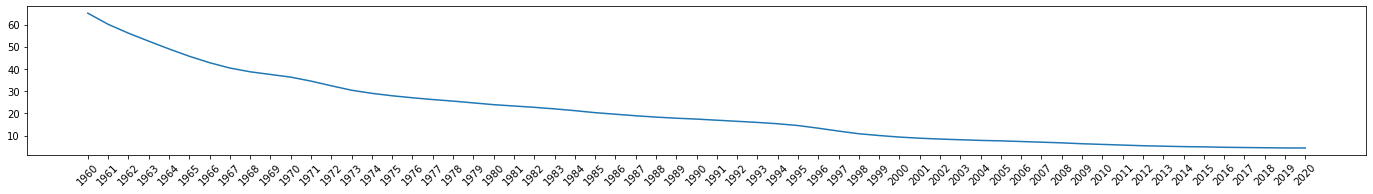

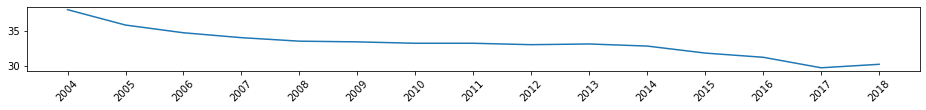

In [17]:
plot_world('Poland')

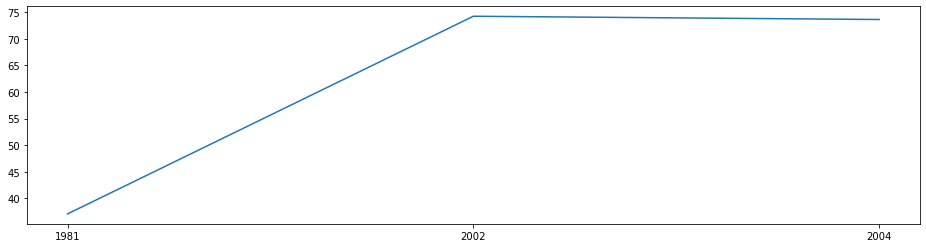

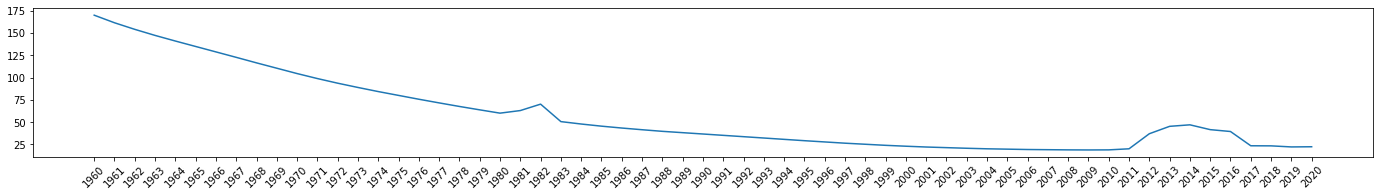

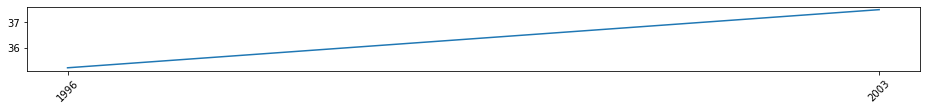

In [18]:
plot_world('Syrian Arab Republic')

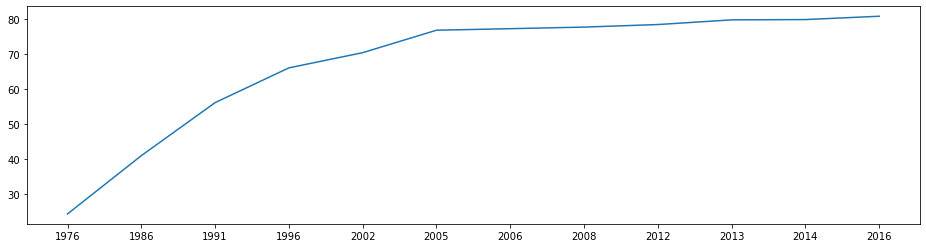

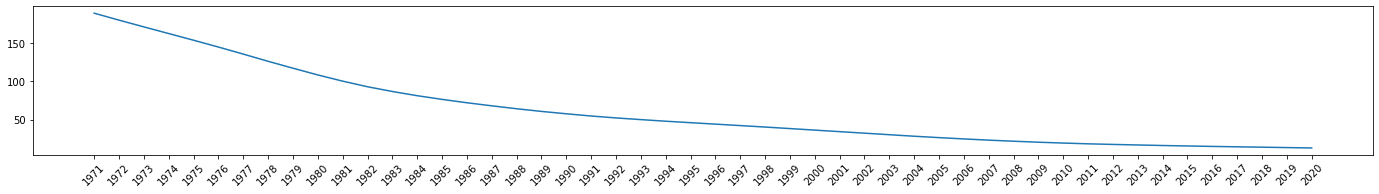

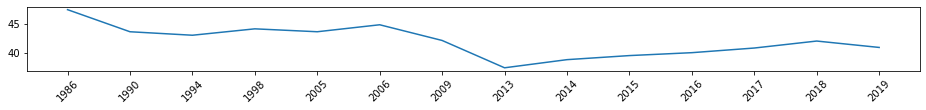

In [19]:
plot_world('Iran, Islamic Rep.')

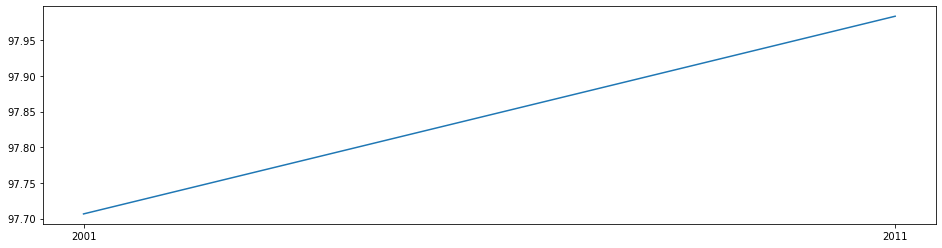

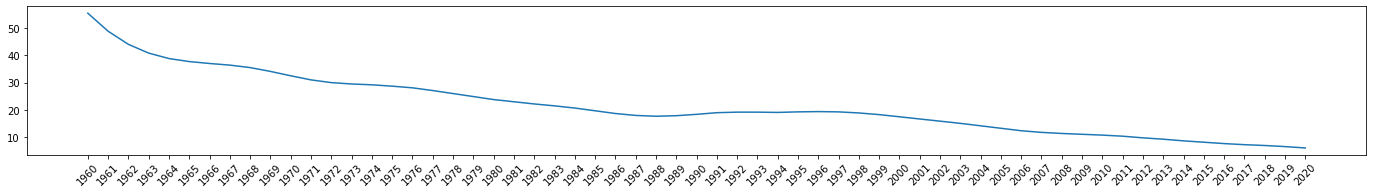

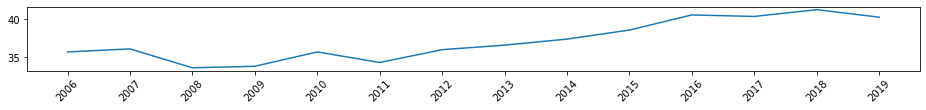

In [20]:
plt.figure(figsize=(16,4))
plt.subplot(1,1,1)
plt.show(country_plotting(literacy, 'Bulgaria'))

plt.figure(figsize=(24,6))
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.show(country_plotting(mortality, 'Bulgaria'))

plt.figure(figsize=(16,4))
plt.subplot(3,1,1)
plt.xticks(rotation=45)
plt.show(country_plotting(gini_index, 'Bulgaria'))

**3. Do a scatter plot of female literacy rate against child mortality rate for Turkey. Do you see a relation? Which direction do you think the relation works?**

From graph I see that mortality rate is incersely proportional to literacy rate. Mortality rate is decreasing while literacy rate is increasing.

In [25]:
def country_scatter(table, country):
    cnt = table[table.index == str(country)].dropna(axis = 1)
    cnt = cnt.transpose()
    cnt = cnt.drop(['Country Code', 'Indicator Name','Indicator Code' ])
    return plt.scatter(cnt.index, cnt[str(country)])

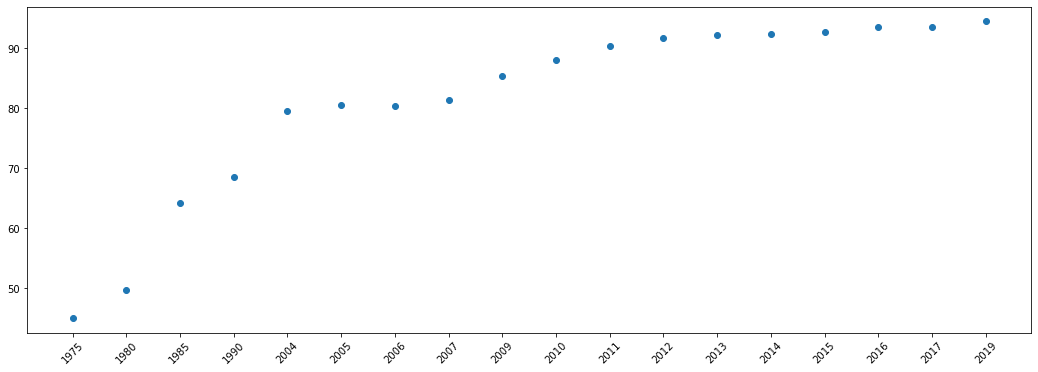

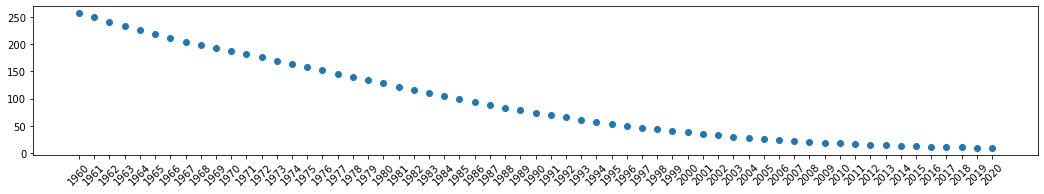

In [26]:
plt.figure(figsize=(18,6))
plt.subplot(1,1,1)
plt.xticks(rotation = 45)
plt.show(country_scatter(literacy, 'Turkiye'))

plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.xticks(rotation = 45)
plt.show(country_scatter(mortality, 'Turkiye'))

**4. Do a scatter plot of female literacy rate against gini index for Turkey. Do you see a relation? Which direction do you think the relation works?  
5. Do a scatter plot of child mortality rate against the gini index for Turkey. Do you see a relation? Which direction do you think the relation works?**

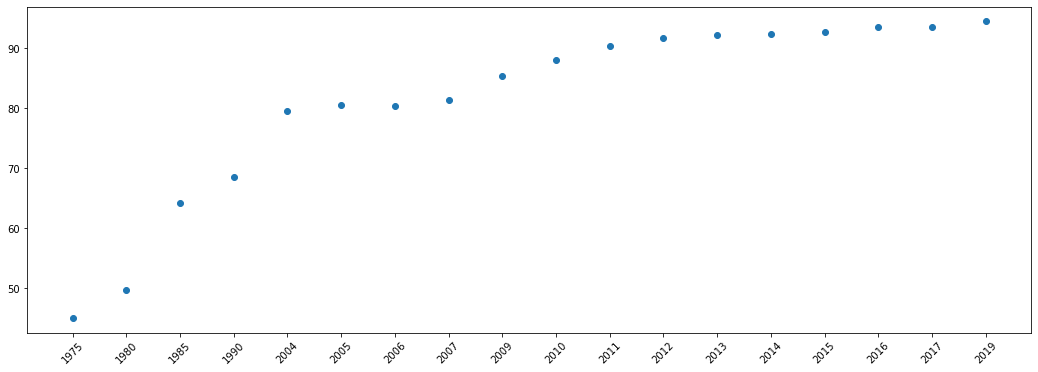

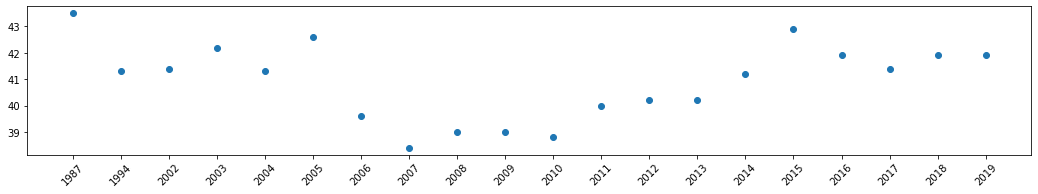

In [27]:
plt.figure(figsize=(18,6))
plt.subplot(1,1,1)
plt.xticks(rotation = 45)
plt.show(country_scatter(literacy, 'Turkiye'))

plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.xticks(rotation = 45)
plt.show(country_scatter(gini_index, 'Turkiye'))

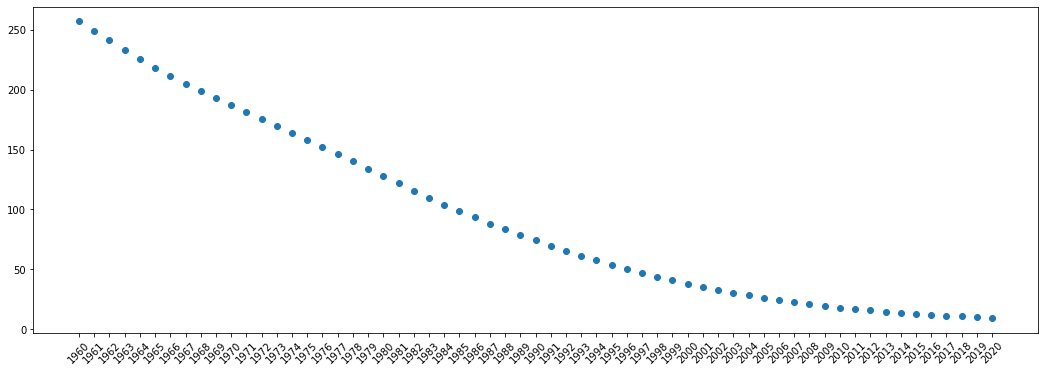

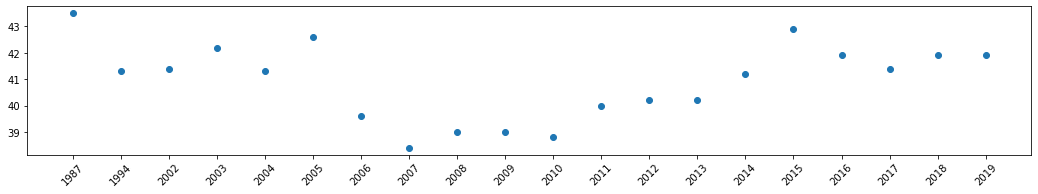

In [29]:
plt.figure(figsize=(18,6))
plt.subplot(1,1,1)
plt.xticks(rotation = 45)
plt.show(country_scatter(mortality, 'Turkiye'))

plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
plt.xticks(rotation = 45)
plt.show(country_scatter(gini_index, 'Turkiye'))

## Question 2

Use Istanbul Municipality Data Server to retrieve the data on [Rail Transportation Data](https://data.ibb.gov.tr/dataset/yas-grubuna-gore-rayli-sistemler-istasyon-bazli-yolcu-ve-yolculuk-sayilari).

1. Explore the dataset and explain each column.
2. Notice that the longitude and lattitude data is not recorded correctly. However, it is easy to correct the data. Explain how you would correct it and then write a function to correct it.
3. Notice that the passenger information is split according to age brackets. Find the total number of passengers for each station ~~in each month~~ and store it in a pandas dataframe. Then plot it on a map of Istanbul. Use disks of different sizes depending on the total number of passengers.
4. Write a function that accepts the age bracket as input (<20, 20-30, 30-60, 60+, unknown) and returns a probability an array of maps (dictionaries) of the form {Station Name: probability that the specific age bracket uses the station}
5. The return value for the function you wrote above is a probability distribution on the set of stations, i.e. the usage patterns of different age brackets. Figure out which stations are favored by each age bracket.
6. How do we check that the usage patterns for different age brackets are different? Use your idea to write a code to check for these differences.

# Importing Dataset as `data`

In [30]:
with urlopen('https://data.ibb.gov.tr/dataset/d3df8db4-1ac6-4bfe-8896-7ec1159caa2b/resource/7aec630d-2757-4da0-97f1-71b140abd818/download/2021-yl-ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.xlsx') as url:
    data = pd.read_excel(url.read())
data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7.424,4.227,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,20-30
1,18.374,9.479,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,30-60
2,3.190,1.430,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,60+
3,949.000,469.000,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,<20
4,8.673,4.222,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9.295,8.209,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,20-30
17078,10.554,9.361,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,30-60
17079,1.552,1.235,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,60+
17080,3.319,2.632,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,<20


**1. Explore the dataset and explain each column.**

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17082 entries, 0 to 17081
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   passage_cnt        17082 non-null  float64
 1   passanger_cnt      17082 non-null  float64
 2   transaction_year   17082 non-null  float64
 3   transaction_month  17082 non-null  int64  
 4   line               17082 non-null  object 
 5   station_name       17082 non-null  object 
 6   station_number     16962 non-null  object 
 7   town               17082 non-null  object 
 8   latitude           15987 non-null  object 
 9   longitude          15987 non-null  object 
 10  Age-Group          17082 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 1.4+ MB


I imported the dataset as `data`. This dataset includes the information of usage of public railway services provided by IBB according to the age groups. `transaction_year` and `transaction_count` columns are about the date that information recorded. `line`, `station_name`, `station_number` and `town` columns keep the information of the raiway line, the station of that line, number of that station and the town that stop belongs, respectively. `passage_counts` includes the total number passage while `passanger_count` includes the number of passanger that used that line. Finally, `Age-Group` column includes the age group that used that lines from that stations in given date. 

I wrote 2 functions.  `thousand times` multiplies the column values with 1000 to be albe to read data easier. And, `float_to_int` function aims to convert float values (e.g. 7424.0) to integer (7424).

In [32]:
len(data['passanger_cnt'])

17082

In [33]:
def thousand_times(df, column):
    for i in range(len(df[column])):
        if df[column][i] % 1 != 0:
            temp = df[column][i]*1000
            df[column][i] = temp
        else: 
            inti = int(df[column][i])
            df[column][i] = inti
    return df

In [34]:
def float_to_int(df,col):
    df[col] = df[col].astype(int)
    return df

In [35]:
data = thousand_times(data, 'passage_cnt')
data = thousand_times(data, 'passanger_cnt')
data = thousand_times(data, 'transaction_year')
data = float_to_int(data, 'passage_cnt')
data = float_to_int(data, 'passanger_cnt')
data = float_to_int(data, 'transaction_year')
data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7424,4227,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,20-30
1,18374,9479,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,30-60
2,3190,1430,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,60+
3,949,469,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,<20
4,8673,4222,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9295,8209,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,20-30
17078,10554,9361,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,30-60
17079,1552,1235,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,60+
17080,3319,2632,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,<20


In [36]:
data = data.dropna(axis = 0)
data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7424,4227,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,20-30
1,18374,9479,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,30-60
2,3190,1430,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,60+
3,949,469,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,<20
4,8673,4222,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9295,8209,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,20-30
17078,10554,9361,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,30-60
17079,1552,1235,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,60+
17080,3319,2632,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,<20


**2. Notice that the longitude and lattitude data is not recorded correctly. However, it is easy to correct the data. Explain how you would correct it and then write a function to correct it.**

When I used `data.info()` I realized that the type of `latitude` and `longitude` columns is object. In fact, it should be float. I converted these columns into float. I created a funct,on `float_fix` to do that. 

In [37]:
def float_fix(dfr,cols):
    dfr[cols] = dfr[cols].apply(pd.to_numeric, downcast='float', errors='coerce') / (1e+13)
    return dfr

In [38]:
data =float_fix(data, 'latitude')
data = float_fix(data, 'longitude')

In [39]:
data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7424,4227,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,20-30
1,18374,9479,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,30-60
2,3190,1430,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,60+
3,949,469,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,<20
4,8673,4222,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9295,8209,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,20-30
17078,10554,9361,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,30-60
17079,1552,1235,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,60+
17080,3319,2632,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,<20


In [40]:
data.dtypes

passage_cnt            int32
passanger_cnt          int32
transaction_year       int32
transaction_month      int64
line                  object
station_name          object
station_number        object
town                  object
latitude             float64
longitude            float64
Age-Group             object
dtype: object

In [41]:
data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7424,4227,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,20-30
1,18374,9479,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,30-60
2,3190,1430,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,60+
3,949,469,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,<20
4,8673,4222,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9295,8209,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,20-30
17078,10554,9361,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,30-60
17079,1552,1235,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,60+
17080,3319,2632,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,<20


**3. Notice that the passenger information is split according to age brackets. Find the total number of passengers for each station ~~in each month~~ and store it in a pandas dataframe.** Then plot it on a map of Istanbul. Use disks of different sizes depending on the total number of passengers.

In [42]:
df = pd.DataFrame()
df = data.groupby('station_name')['passanger_cnt'].sum()
df = pd.DataFrame(df)
df['station_name'] = df.index
df = df.reset_index(drop = True)
df

,passanger_cnt,station_name
0,970164,4 Levent 2 Güney
1,1253533,4 Levent Kuzey
2,2419752,AKSARAY
3,805858,AKSARAY 1
4,475360,ALTINŞEHİR
...,...,...
263,1409885,Şehitlik
264,1005996,Şişhane Güney
265,1383547,Şişhane Kuzey
266,3514906,Şişli 2 Kuzey


In [43]:
stations = list(data['station_name'].unique())

In [44]:
def f():
    coord_dict = {}
    for inc in range(len(df['station_name'])):
        coord_dict[stations[inc]] = ""
    for itr in data['station_name']:
        l = list(data[data['station_name'] == itr]['latitude'])
        coord_dict[itr] = l[0]
    return coord_dict

In [45]:
def g():
    coord_dict_long = {}
    for inc in range(len(df['station_name'])):
        coord_dict_long[stations[inc]] = ""
    for itr in data['station_name']:
        l = list(data[data['station_name'] == itr]['longitude'])
        coord_dict_long[itr] = l[0]
    return coord_dict_long

In [46]:
lat = f()
long = g()

In [47]:
lat

{'KABATAS': 41.0340555555556,
 'TAKSIM': 4.103675e-07,
 'Beyoğlu': 41.0284722222222,
 'Karaköy': 41.0228055555556,
 'AKSARAY': 41.0118333333333,
 'AKSARAY 1': 41.0118333333333,
 'ATAKOY': 40.9913611111111,
 'BAGCILAR MEYDAN': 4.10345e-08,
 'BAHCELIEVLER': 40.9956666666667,
 'BAKIRKOY': 40.9965833333333,
 'BAYRAMPASA': 41.0341944444444,
 'DAVUTPASA': 4.1020000457763674e-12,
 'EMNIYET': 41.0179722222222,
 'ESENLER': 41.0375833333333,
 'KARTALTEPE': 4.10485e-08,
 'KIRAZLI': 41.0310555555556,
 'MENDERES': 4.10425e-08,
 'MERTER': 41.0073888888889,
 'OTOGAR': 41.0400555555556,
 'OTOGAR 1': 41.0400555555556,
 'SAGMALCILAR': 41.0409166666667,
 'TERAZIDERE': 41.0305277777778,
 'UCYUZLU': 41.0367777777778,
 'ULUBATLI': 41.0242222222222,
 'YENIKAPI': 41.0051944444444,
 'ZEYTINBURNU': 4.100175e-07,
 '4 Levent 2 Güney': 41.0857222222222,
 '4 Levent Kuzey': 41.0857222222222,
 'Atatürk Oto Sanayi Güney': 4.111875e-07,
 'Atatürk Oto Sanayi Kuzey': 4.111875e-07,
 'Darüşşafaka': 41.1302222222222,
 'Darü

In [48]:
long

{'KABATAS': 28.9920277777778,
 'TAKSIM': 28.9864444444444,
 'Beyoğlu': 28.9741111111111,
 'Karaköy': 28.9740833333333,
 'AKSARAY': 28.9478888888889,
 'AKSARAY 1': 28.9478888888889,
 'ATAKOY': 28.8458333333333,
 'BAGCILAR MEYDAN': 28.8565833333333,
 'BAHCELIEVLER': 28.8635555555556,
 'BAKIRKOY': 28.8744166666667,
 'BAYRAMPASA': 28.9202222222222,
 'DAVUTPASA': 28.8999444444444,
 'EMNIYET': 28.9388055555556,
 'ESENLER': 28.8886111111111,
 'KARTALTEPE': 28.8957777777778,
 'KIRAZLI': 28.8420833333333,
 'MENDERES': 28.8780555555556,
 'MERTER': 28.8963055555556,
 'OTOGAR': 28.8945833333333,
 'OTOGAR 1': 28.8945833333333,
 'SAGMALCILAR': 28.9070555555556,
 'TERAZIDERE': 28.8976666666667,
 'UCYUZLU': 28.8706944444444,
 'ULUBATLI': 28.9298611111111,
 'YENIKAPI': 28.9517222222222,
 'ZEYTINBURNU': 28.8900833333333,
 '4 Levent 2 Güney': 29.0068611111111,
 '4 Levent Kuzey': 29.0068611111111,
 'Atatürk Oto Sanayi Güney': 29.0238055555556,
 'Atatürk Oto Sanayi Kuzey': 29.0238055555556,
 'Darüşşafaka':

In [55]:
coord_names = list(long.keys())
crd = pd.DataFrame(coord_names, columns = ['Station Names'])
crd

,Station Names
0,KABATAS
1,TAKSIM
2,Beyoğlu
3,Karaköy
4,AKSARAY
...,...
263,[NULL]
264,Bahçelievler
265,ISTINYE
266,KARAKOY


In [56]:
crd['latitude'] = lat.values()
crd['longitude'] = lat.values()
crd = crd.dropna(axis = 0)
crd

,Station Names,latitude,longitude
0,KABATAS,4.103406e+01,4.103406e+01
1,TAKSIM,4.103675e-07,4.103675e-07
2,Beyoğlu,4.102847e+01,4.102847e+01
3,Karaköy,4.102281e+01,4.102281e+01
4,AKSARAY,4.101183e+01,4.101183e+01
...,...,...,...
262,Mahmutbey M7 Hol 4,4.105428e+01,4.105428e+01
264,Bahçelievler,4.099503e+01,4.099503e+01
265,ISTINYE,4.111331e+01,4.111331e+01
266,KARAKOY,4.102175e-07,4.102175e-07


In [51]:
import folium
from folium import plugins

In [60]:
m = folium.Map([42 ,29], zoom_start=5,width="%100",height="%100")
location=crd[["longitude","latitude"]]
 
plugins.MarkerCluster(location).add_to(m)
 
m

**4. Write a function that accepts the age bracket as input (<20, 20-30, 30-60, 60+, unknown) and returns a probability an array of maps (dictionaries) of the form {Station Name: probability that the specific age bracket uses the station}**

I wrote a function named `q2_4` whick takes age bracket as an input outputs the probabilty that age group uses that station. I created an empty dictionary at first, and then filled it with the information that I calculated with a for loop which is inside of the function.

In [61]:
def q2_4(age_bracket):
    stop_dict = {}
    age_df = data[data['Age-Group'] == age_bracket]
    for i in df['station_name']:
        total = data[data['station_name'] == str(i)]['passanger_cnt'].sum()
        partial = age_df[age_df['station_name'] == str(i)]['passanger_cnt'].sum()
        stop_dict[str(i)] = partial / total
    return stop_dict

In [62]:
q2_4('20-30')

{'4 Levent 2 Güney': 0.35821469359819574,
 '4 Levent Kuzey': 0.3151077793723819,
 'AKSARAY': 0.29329451943835566,
 'AKSARAY 1': 0.3197250632245383,
 'ALTINŞEHİR': 0.2901969033995288,
 'ALİBEYKÖY BATI': 0.3322468735963689,
 'ALİBEYKÖY DOĞU': 0.31735289697958485,
 'ATAKOY': 0.32937143491046605,
 'Acıbadem (Batı)': 0.34015451233622856,
 'Acıbadem (Doğu)': 0.34534133761410374,
 'Aksaray': 0.24760181547322427,
 'Akıncılar': 0.2818829434764976,
 'Akşemsettin': 0.2737457501872515,
 'Ali Fuat Başgil': 0.29818544931092095,
 'Altunizade 1': 0.36563208741087877,
 'Altunizade 2': 0.31772659356690747,
 'Ataköy': 0.26492071817392515,
 'Atalar': 0.2784309955531892,
 'Atatürk Oto Sanayi Güney': 0.31616785657058416,
 'Atatürk Oto Sanayi Kuzey': 0.27211171732710554,
 'Atatürk Öğrenci Yurdu': 0.3036192233668348,
 'Aydıntepe': 0.3300800536887014,
 'Ayrılıkçeşme': 0.3872741438930288,
 'Ayrılıkçeşmesi': 0.3794149954251007,
 'BAGCILAR MEYDAN': 0.3545763751136593,
 'BAHCELIEVLER': 0.30071882005158546,
 'BAKIR

In [63]:
q2_4('60+')

{'4 Levent 2 Güney': 0.040947716056254406,
 '4 Levent Kuzey': 0.051318154368492894,
 'AKSARAY': 0.05152139558103475,
 'AKSARAY 1': 0.048764174333443364,
 'ALTINŞEHİR': 0.044339027263547624,
 'ALİBEYKÖY BATI': 0.03845653767050424,
 'ALİBEYKÖY DOĞU': 0.029485005259429407,
 'ATAKOY': 0.04768342846841921,
 'Acıbadem (Batı)': 0.06810063007483086,
 'Acıbadem (Doğu)': 0.06118145463871501,
 'Aksaray': 0.05317543891858434,
 'Akıncılar': 0.06644272535051407,
 'Akşemsettin': 0.05286105185902602,
 'Ali Fuat Başgil': 0.06297746578355504,
 'Altunizade 1': 0.034969231692510816,
 'Altunizade 2': 0.03989946822278171,
 'Ataköy': 0.08498905078126158,
 'Atalar': 0.08994932016051903,
 'Atatürk Oto Sanayi Güney': 0.0442537433012267,
 'Atatürk Oto Sanayi Kuzey': 0.06023059234254879,
 'Atatürk Öğrenci Yurdu': 0.06368777083616141,
 'Aydıntepe': 0.046648450857261554,
 'Ayrılıkçeşme': 0.05422900995007305,
 'Ayrılıkçeşmesi': 0.060656837022100465,
 'BAGCILAR MEYDAN': 0.03591044040846594,
 'BAHCELIEVLER': 0.0610754

**5. The return value for the function you wrote above is a probability distribution on the set of stations, i.e. the usage patterns of different age brackets. Figure out which stations are favored by each age bracket.**

I wrote a function named `fav` which takes the age interval as input and outputs the most used station name in terms of probabilty distribution.

In [64]:
age_groups = data['Age-Group'].unique()

In [65]:
age_20_30 = q2_4('20-30')
age_30_60 = q2_4('30-60')
age_60_plus = q2_4('60+')
age_below_20 = q2_4('<20')
age_unknown = q2_4('Unknown')

In [66]:
age_20_30

{'4 Levent 2 Güney': 0.35821469359819574,
 '4 Levent Kuzey': 0.3151077793723819,
 'AKSARAY': 0.29329451943835566,
 'AKSARAY 1': 0.3197250632245383,
 'ALTINŞEHİR': 0.2901969033995288,
 'ALİBEYKÖY BATI': 0.3322468735963689,
 'ALİBEYKÖY DOĞU': 0.31735289697958485,
 'ATAKOY': 0.32937143491046605,
 'Acıbadem (Batı)': 0.34015451233622856,
 'Acıbadem (Doğu)': 0.34534133761410374,
 'Aksaray': 0.24760181547322427,
 'Akıncılar': 0.2818829434764976,
 'Akşemsettin': 0.2737457501872515,
 'Ali Fuat Başgil': 0.29818544931092095,
 'Altunizade 1': 0.36563208741087877,
 'Altunizade 2': 0.31772659356690747,
 'Ataköy': 0.26492071817392515,
 'Atalar': 0.2784309955531892,
 'Atatürk Oto Sanayi Güney': 0.31616785657058416,
 'Atatürk Oto Sanayi Kuzey': 0.27211171732710554,
 'Atatürk Öğrenci Yurdu': 0.3036192233668348,
 'Aydıntepe': 0.3300800536887014,
 'Ayrılıkçeşme': 0.3872741438930288,
 'Ayrılıkçeşmesi': 0.3794149954251007,
 'BAGCILAR MEYDAN': 0.3545763751136593,
 'BAHCELIEVLER': 0.30071882005158546,
 'BAKIR

In [67]:
def fav(interval):
    max_int = q2_4(str(interval))
    max_ratio = max(max_int.values())
    for key, val in max_int.items():
        if val == max_ratio:
            print(str(key))
    

# Favorite stations by age goups

In [68]:
print("Most favored station by <20 is")
fav('<20')

Most favored station by <20 is
ÇEKMEKÖY 1


In [69]:
print("Most favored station by 20-30 ages is")
fav('20-30')

Most favored station by 20-30 ages is
İTÜ kuzey


In [70]:
print("Most favored station by 30-60 ages is")
fav('30-60')

Most favored station by 30-60 ages is
Bahçelievler


In [71]:
print("Most favored station by 60+ ages is")
fav('60+')

Most favored station by 60+ ages is
M2 Levent


In [72]:
print("Most favored station by Unknown ages is")
fav('Unknown')

Most favored station by Unknown ages is
ISTINYE
MALTEPE ALTINTEPE


6. How do we check that the usage patterns for different age brackets are different? Use your idea to write a code to check for these differences.

**We can use t-test for this.**

# Question 3

For this question use Yahoo Finance API via [yfinance](https://pypi.org/project/yfinance/) library. Retrieve the data for Microsoft [MSFT], Apple [AAPL] and NASDAQ-100 [NDX]. from January 1, 2000.

1. Calculate the log of each series, and then calculate the first derivative of the result. What you got is called the [log-return](https://core.ac.uk/download/pdf/161062652.pdf) of each series. 
2. Merge the series you obtain in Step 1 into a single pandas dataframe.
3. Plot the histograms of results you obtained above (use 10 bins).
4. Plot all three series in a single plot to compare. Do you see a relationship? 
5. How do we see if there are any correlations between these series? What is the statistically correct way of testing it? Find the right statistical test and measure all three correlations.

# Importing `yfinance` and retrieving data.

In [51]:
import yfinance as yf
import numpy as np
import pandas as pd

In [52]:
msft = yf.download("NDX", start = '2000-01-01')
aapl = yf.download("AAPL", start = '2000-01-01')
ndx = yf.download("MSFT", start = '2000-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [53]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03 00:00:00-05:00,0.936384,1.004464,0.907924,0.999442,0.853355,535796800
2000-01-04 00:00:00-05:00,0.966518,0.987723,0.903460,0.915179,0.781409,512377600
2000-01-05 00:00:00-05:00,0.926339,0.987165,0.919643,0.928571,0.792843,778321600
2000-01-06 00:00:00-05:00,0.947545,0.955357,0.848214,0.848214,0.724232,767972800
2000-01-07 00:00:00-05:00,0.861607,0.901786,0.852679,0.888393,0.758538,460734400
...,...,...,...,...,...,...
2022-10-04 00:00:00-04:00,145.029999,146.220001,144.259995,146.100006,146.100006,87830100
2022-10-05 00:00:00-04:00,144.070007,147.380005,143.009995,146.399994,146.399994,79471000
2022-10-06 00:00:00-04:00,145.809998,147.539993,145.220001,145.429993,145.429993,68402200


**1. Calculate the log of each series**, and then calculate the first derivative of the result. What you got is called the [log-return](https://core.ac.uk/download/pdf/161062652.pdf) of each series.

I calculated the log of each series by `log_of_series` function. Then, I calculated the log-return with the function `first_dervative`. I collected derivatives in a single dataframe called `first_drv`.

In [75]:
def log_of_series(series):
    log = np.log(series['Close'])
    return log

In [76]:
log_aapl = log_of_series(aapl)

In [77]:
log_ndx = log_of_series(ndx)

In [78]:
log_msft = log_of_series(msft)

In [79]:
#df['log_ret'] = np.log(df.price) - np.log(df.price.shift(1))

In [80]:
def first_derivative(series):
    log_return = log_of_series(series) - np.log(series['Close'].shift(1))
    return log_return
    #log_return = np.log(df.price) - np.log(df.price.shift(1))

In [81]:
first_drv = pd.DataFrame()
first_drv['AAPL'] = first_derivative(aapl)
first_drv['NDX'] = first_derivative(ndx)
first_drv['MSFT'] = first_derivative(msft)

In [82]:
first_drv

,AAPL,NDX,MSFT
Date,,,
2000-01-03 00:00:00-05:00,NaN,NaN,NaN
2000-01-04 00:00:00-05:00,-0.088077,-0.034364,-0.066635
2000-01-05 00:00:00-05:00,0.014527,0.010489,-0.011027
2000-01-06 00:00:00-05:00,-0.090514,-0.034072,-0.048636
2000-01-07 00:00:00-05:00,0.046281,0.012984,0.054971
...,...,...,...
2022-10-04 00:00:00-04:00,0.025300,0.033253,0.030934
2022-10-05 00:00:00-04:00,0.002051,0.001285,-0.000808
2022-10-06 00:00:00-04:00,-0.006648,-0.009718,-0.007605


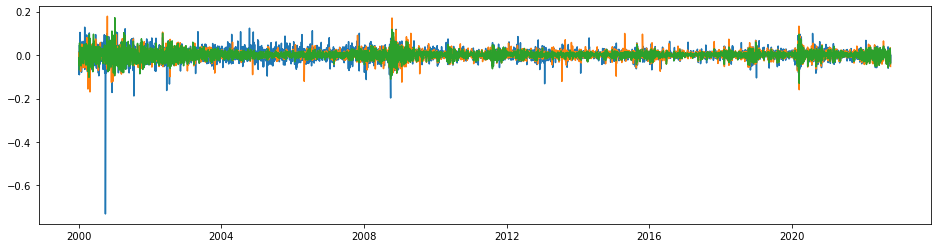

In [85]:
plt.figure(figsize=(16,4))
plt.plot(first_drv['AAPL'])
plt.plot(first_drv['NDX'])
plt.plot(first_drv['MSFT'])

**2. Merge the series you obtain in Step 1 into a single pandas dataframe.**

I merged series with pandas.concat function. Then, I changed column names so that I can visualize easier.

In [86]:
yahoo_df = pd.concat([log_aapl, log_msft, log_ndx], axis = 1)

In [87]:
yahoo_df 

,Close,Close,Close
Date,,,
2000-01-03 00:00:00-05:00,-0.000558,8.240266,4.065280
2000-01-04 00:00:00-05:00,-0.088636,8.173632,4.030917
2000-01-05 00:00:00-05:00,-0.074108,8.162605,4.041405
2000-01-06 00:00:00-05:00,-0.164622,8.113969,4.007333
2000-01-07 00:00:00-05:00,-0.118341,8.168940,4.020317
...,...,...,...
2022-10-04 00:00:00-04:00,4.984291,9.357254,5.516971
2022-10-05 00:00:00-04:00,4.986343,9.356446,5.518256
2022-10-06 00:00:00-04:00,4.979695,9.348841,5.508538


In [88]:
dfs = [log_aapl, log_ndx, log_msft]

In [89]:
import functools as ft
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='Date'), dfs)
df_final

,Close_x,Close_y,Close
Date,,,
2000-01-03 00:00:00-05:00,-0.000558,4.065280,8.240266
2000-01-04 00:00:00-05:00,-0.088636,4.030917,8.173632
2000-01-05 00:00:00-05:00,-0.074108,4.041405,8.162605
2000-01-06 00:00:00-05:00,-0.164622,4.007333,8.113969
2000-01-07 00:00:00-05:00,-0.118341,4.020317,8.168940
...,...,...,...
2022-10-03 00:00:00-04:00,4.958991,5.483718,9.326320
2022-10-04 00:00:00-04:00,4.984291,5.516971,9.357254
2022-10-05 00:00:00-04:00,4.986343,5.518256,9.356446


In [90]:
df_final = df_final.rename(columns = {'Close_x':'Close AAPL', 'Close_y':'Close NDX', 'Close':'Close MSFT'})
df_final

,Close AAPL,Close NDX,Close MSFT
Date,,,
2000-01-03 00:00:00-05:00,-0.000558,4.065280,8.240266
2000-01-04 00:00:00-05:00,-0.088636,4.030917,8.173632
2000-01-05 00:00:00-05:00,-0.074108,4.041405,8.162605
2000-01-06 00:00:00-05:00,-0.164622,4.007333,8.113969
2000-01-07 00:00:00-05:00,-0.118341,4.020317,8.168940
...,...,...,...
2022-10-03 00:00:00-04:00,4.958991,5.483718,9.326320
2022-10-04 00:00:00-04:00,4.984291,5.516971,9.357254
2022-10-05 00:00:00-04:00,4.986343,5.518256,9.356446


**3. Plot the histograms of results you obtained above (use 10 bins).**   

## Plotting of results

In [91]:
def histo(conn):
    return plt.hist(df_final[conn], bins = 10 )

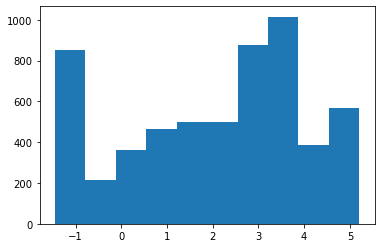

In [92]:
aapl_hist =  histo('Close AAPL')

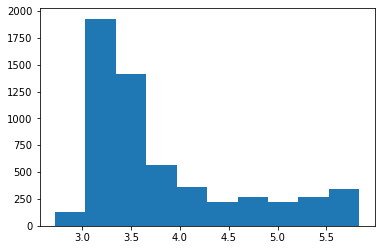

In [93]:
ndx_hist = histo('Close NDX')

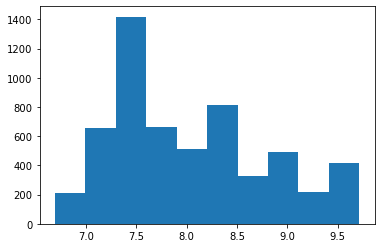

In [94]:
msft_hist = histo('Close MSFT')

**4. Plot all three series in a single plot to compare. Do you see a relationship?** 

## Plotting all in a single plot  
In the plot, I see that all of them shows a similar performance which means thay are all affected by things occured around the world. (e.g. around 2009 all of them has the similar decrease, also betweeen 2000 and 2003 all of them decreased slighltly, after that we see some increase.) Also today, all of them are greater than the beginning of 2000.

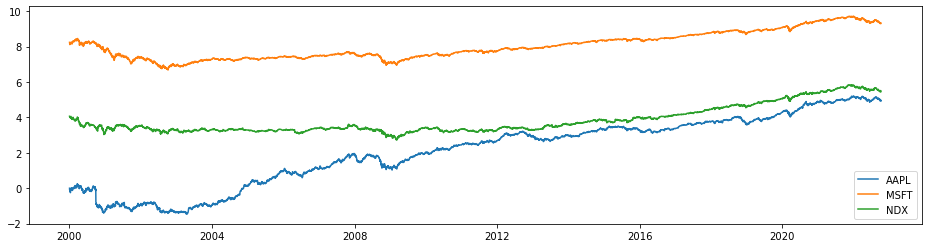

In [95]:
plt.figure(figsize=(16,4))
plt.plot(log_aapl)
plt.plot(log_msft)
plt.plot(log_ndx)
plt.legend(['AAPL', 'MSFT', 'NDX'])
plt.show()

**5. How do we see if there are any correlations between these series? What is the statistically correct way of testing it? Find the right statistical test and measure all three correlations.**

I used corr() function to find the correlation between series.

In [97]:
log_aapl.corr(log_msft)

0.8547604061942181

In [99]:
log_aapl.corr(log_ndx)

0.7471461690417669

In [100]:
log_msft.corr(log_ndx)

0.9428895010946847